# Random Forest Regression

In [14]:
# importing standard DS and ML libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# reading dataset and identifying target variable
data = pd.read_csv('Position_Salaries.csv')
X = data[['Level']].values
y = data['Salary'].values

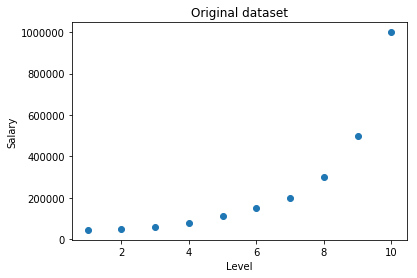

In [16]:
# visualizing dataset
plt.scatter(X,y)
plt.title('Original dataset')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [17]:
# getting some statistical info
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


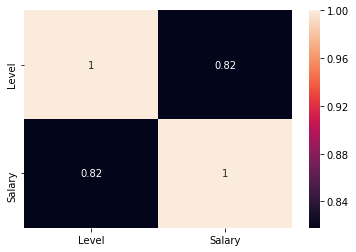

In [18]:
# generating correlation heatmap
sns.heatmap(data.corr(),annot=True)

In [19]:
# creating model and fitting data
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=10,random_state=0)
rfr.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [20]:
# predicting new values
pred = rfr.predict([[5.5]])
pred

array([108000.])

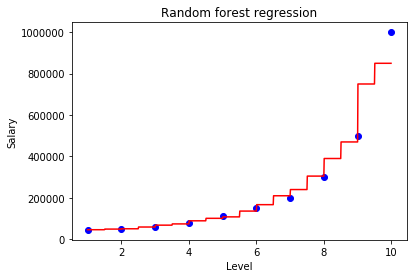

In [21]:
# visualizing random forest regression
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'blue')
plt.plot(X_grid, rfr.predict(X_grid), color = 'red')
plt.title('Random forest regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [22]:
# calculating estimator score on train dataset
rfr.score(X,y)

0.9704434230386582

In [23]:
# calculating MAE
from sklearn import metrics
metrics.mean_absolute_error(X,y)

249494.5

In [24]:
# calculating MSE
metrics.mean_squared_error(X,y)

142908421038.5

In [25]:
# calculating RMSE
np.sqrt(metrics.mean_squared_error(X,y))

378032.30158083054